# Secure and Private AI : Part 3 - Training Neural Networks (Solutions)

In [1]:
import torch
from torch import nn
import torch.nn.functional as F
from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5, ), (0.5, )),
                              ])
# Download and load the training data
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

In [2]:
# Build a feed-forward network
model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10))

# Define the loss
criterion = nn.CrossEntropyLoss()
print('criterion')
print(criterion)

# Get our data
images, labels = next(iter(trainloader))
# Flatten images
images = images.view(images.shape[0], -1)

print(images)
# Forward pass, get our logits
logits = model(images)
# Calculate the loss with the logits and the labels
loss = criterion(logits, labels)

print(loss)

criterion
CrossEntropyLoss()
tensor([[-1., -1., -1.,  ..., -1., -1., -1.],
        [-1., -1., -1.,  ..., -1., -1., -1.],
        [-1., -1., -1.,  ..., -1., -1., -1.],
        ...,
        [-1., -1., -1.,  ..., -1., -1., -1.],
        [-1., -1., -1.,  ..., -1., -1., -1.],
        [-1., -1., -1.,  ..., -1., -1., -1.]])
tensor(2.3126, grad_fn=<NllLossBackward>)


## Exercise: 
    
Build a model that returns the log-softmax as the output and calculate the loss using the negative log likelihood loss.

In [3]:
# Build a feed-forward network
model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim=1)
                     )

# Define the loss
criterion = nn.NLLLoss()
print('criterion')
print(criterion)

# Get our data
images, labels = next(iter(trainloader))
# Flatten images
images = images.view(images.shape[0], -1)

print(images)
# Forward pass, get our logits
logits = model(images)
# Calculate the loss with the logits and the labels
loss = criterion(logits, labels)

print(loss)

criterion
NLLLoss()
tensor([[-1., -1., -1.,  ..., -1., -1., -1.],
        [-1., -1., -1.,  ..., -1., -1., -1.],
        [-1., -1., -1.,  ..., -1., -1., -1.],
        ...,
        [-1., -1., -1.,  ..., -1., -1., -1.],
        [-1., -1., -1.,  ..., -1., -1., -1.],
        [-1., -1., -1.,  ..., -1., -1., -1.]])
tensor(2.3272, grad_fn=<NllLossBackward>)


## Autograd

Torch provides a module, autograd, for automatically calculating the gradients of tensors. 
We can use it to calculate the gradients of all our parameters with respect to the loss.

In [4]:
x = torch.randn(2,2, requires_grad=True)
print(x)

tensor([[-0.3005,  1.1679],
        [ 0.0308,  0.6812]], requires_grad=True)


In [5]:
y = x**2
print(y)

tensor([[9.0282e-02, 1.3641e+00],
        [9.4915e-04, 4.6403e-01]], grad_fn=<PowBackward0>)


In [6]:
## grad_fn shows the function that generated this variable
print(y.grad_fn)

In [7]:
z = y.mean()
print(z)

tensor(0.4798, grad_fn=<MeanBackward0>)


In [8]:
print(x.grad)

None


In [9]:
z.backward()
print(x.grad)
print(x/2)

tensor([[-0.1502,  0.5840],
        [ 0.0154,  0.3406]])
tensor([[-0.1502,  0.5840],
        [ 0.0154,  0.3406]], grad_fn=<DivBackward0>)


## Loss and Autograd together

When we create a network with PyTorch, all of the parameters are initialized with requires_grad = True. 

This means that when we calculate the loss and call loss.backward(), the gradients for the parameters are calculated. 

These gradients are used to update the weights with gradient descent. 

Below you can see an example of calculating the gradients using a backwards pas

In [10]:
# Build a feed-forward network
model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim=1))

criterion = nn.NLLLoss()
images, labels = next(iter(trainloader))
images = images.view(images.shape[0], -1)

logps = model(images)
loss = criterion(logps, labels)

In [11]:
print('Before backward pass: \n', model[0].weight.grad)

loss.backward()

print('After backward pass: \n', model[0].weight.grad)

Before backward pass: 
 None
After backward pass: 
 tensor([[-0.0004, -0.0004, -0.0004,  ..., -0.0004, -0.0004, -0.0004],
        [-0.0013, -0.0013, -0.0013,  ..., -0.0013, -0.0013, -0.0013],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        ...,
        [-0.0007, -0.0007, -0.0007,  ..., -0.0007, -0.0007, -0.0007],
        [ 0.0016,  0.0016,  0.0016,  ...,  0.0016,  0.0016,  0.0016],
        [-0.0010, -0.0010, -0.0010,  ..., -0.0010, -0.0010, -0.0010]])


## Training the network

In [12]:
from torch import optim

# Optimizers require the parameters to optimize and a learning rate
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [13]:
print('Initial weights - ', model[0].weight)

images, labels = next(iter(trainloader))
images.resize_(64, 784)

# Clear the gradients, do this because gradients are accumulated
optimizer.zero_grad()

# Forward pass, then backward pass, then update weights
output = model.forward(images)
loss = criterion(output, labels)
loss.backward()
print('Gradient -', model[0].weight.grad)

Initial weights -  Parameter containing:
tensor([[ 0.0032, -0.0306,  0.0024,  ...,  0.0189,  0.0254, -0.0141],
        [-0.0143,  0.0241, -0.0322,  ..., -0.0284, -0.0339,  0.0028],
        [ 0.0268,  0.0306, -0.0296,  ...,  0.0029, -0.0179,  0.0179],
        ...,
        [ 0.0035, -0.0009, -0.0033,  ...,  0.0285,  0.0051, -0.0294],
        [-0.0066,  0.0179, -0.0060,  ...,  0.0012, -0.0074,  0.0304],
        [-0.0297, -0.0225, -0.0018,  ...,  0.0074,  0.0031,  0.0257]],
       requires_grad=True)
Gradient - tensor([[ 0.0013,  0.0013,  0.0013,  ...,  0.0013,  0.0013,  0.0013],
        [ 0.0015,  0.0015,  0.0015,  ...,  0.0015,  0.0015,  0.0015],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        ...,
        [-0.0002, -0.0002, -0.0002,  ..., -0.0002, -0.0002, -0.0002],
        [ 0.0012,  0.0012,  0.0012,  ...,  0.0012,  0.0012,  0.0012],
        [-0.0002, -0.0002, -0.0002,  ..., -0.0002, -0.0002, -0.0002]])


In [14]:
# Take an update step and few the new weights
optimizer.step()
print('Updated weights - ', model[0].weight)

Updated weights -  Parameter containing:
tensor([[ 0.0031, -0.0306,  0.0023,  ...,  0.0189,  0.0253, -0.0141],
        [-0.0143,  0.0241, -0.0322,  ..., -0.0284, -0.0339,  0.0028],
        [ 0.0268,  0.0306, -0.0296,  ...,  0.0029, -0.0179,  0.0179],
        ...,
        [ 0.0035, -0.0009, -0.0033,  ...,  0.0285,  0.0051, -0.0294],
        [-0.0066,  0.0179, -0.0060,  ...,  0.0012, -0.0074,  0.0304],
        [-0.0297, -0.0225, -0.0018,  ...,  0.0074,  0.0031,  0.0257]],
       requires_grad=True)


## Training for real

### Exercise:

Implement the training pass for our network. 
If you implemented it correctly, you should see the training loss drop with each epoch.

In [15]:
model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim=1))

criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.003)

epochs = 5
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
    
        # TODO: Training pass
        optimizer.zero_grad()
        
        output = model.forward(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print(f"Training loss: {running_loss/len(trainloader)}")

Training loss: 1.9068074593666011
Training loss: 0.8489092080387225
Training loss: 0.5150735600511911
Training loss: 0.42009466452829874
Training loss: 0.3772694453247575


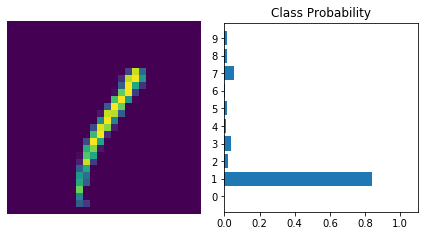

In [16]:
%matplotlib inline
import helper

images, labels = next(iter(trainloader))

img = images[0].view(1, 784)
# Turn off gradients to speed up this part
with torch.no_grad():
    logps = model.forward(img)

# Output of the network are logits, need to take softmax for probabilities
ps = torch.exp(logps)
helper.view_classify(img.view(1, 28, 28), ps)